In [1]:
from scipy.sparse import spdiags, block_diag
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Building A matrix
m = 8
n = m * m
x2 = np.linspace(-10, 10, m+1)
dx = x2[1] - x2[0]


e0 = np.zeros((n, 1))  # vector of zeros
e1 = np.ones((n, 1))   # vector of ones
e2 = np.copy(e1)    # copy the one vector
e4 = np.copy(e0)    # copy the zero vector

for j in range(1, m+1):
    e2[m*j-1] = 0  # overwrite every m^th value with zero
    e4[m*j-1] = 1  # overwirte every m^th value with one

# Shift to correct positions
e3 = np.zeros_like(e2)
e3[1:n] = e2[0:n-1]
e3[0] = e2[n-1]

e5 = np.zeros_like(e4)
e5[1:n] = e4[0:n-1]
e5[0] = e4[n-1]

# Place diagonal elements
diagonals = [e1.flatten(), e1.flatten(), e5.flatten(), 
             e2.flatten(), -4 * e1.flatten(), e3.flatten(), 
             e4.flatten(), e1.flatten(), e1.flatten()]
offsets = [-(n-m), -m, -m+1, -1, 0, 1, m-1, m, (n-m)]

matA = spdiags(diagonals, offsets, n, n).toarray()
A1 = (dx)**(-2) * matA

# Building B matrix
diagonals = [e1.flatten(), -e1.flatten(), e1.flatten(), -e1.flatten()]
offsets = [-(n-m), -m, m, (n-m)]
matB = spdiags(diagonals, offsets, n ,n).toarray()
A2 = (2 * dx)**(-1) * matB

# Building C matrix
diagonals = [e5.flatten(), -e2.flatten(), e3.flatten(), -e4.flatten()]
offsets = [-m+1, -1, 1, m-1]
matC = spdiags(diagonals, offsets, n, n).toarray()
A3 = (2 * dx)**(-1) * matC

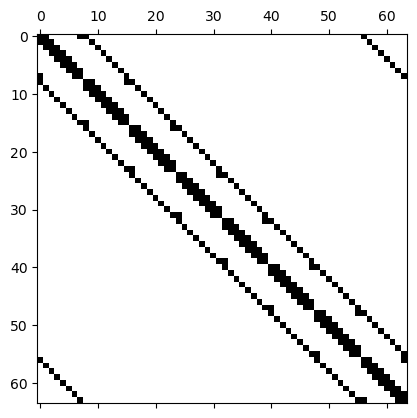

In [4]:
plt.spy(matA)
plt.show()

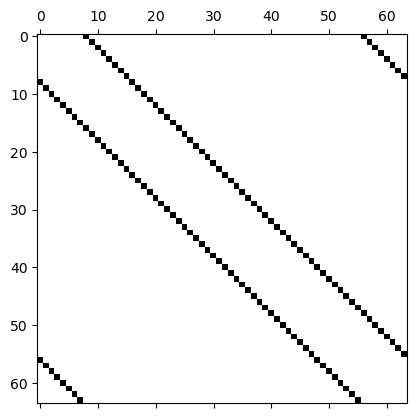

In [5]:
plt.spy(matB)
plt.show()

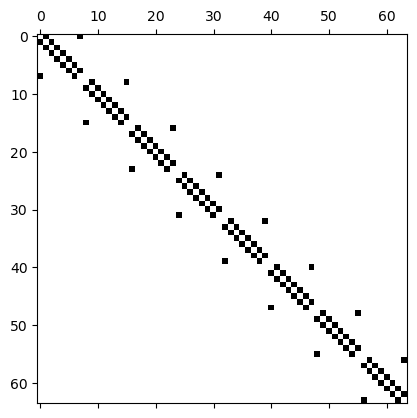

In [6]:
plt.spy(matC)
plt.show()